In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import scipy.stats as stats

# Leitura do CSV, remoção de valores nulos e duplicados, e codificação (encoding).

In [19]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv', sep=';')
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [21]:
# separando a coluna de Blood Pressure em sistólica e diastólica
if 'Blood Pressure' in df.columns:
    df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True)

    # Convertendo para numérico
    df['Systolic_BP'] = pd.to_numeric(df['Systolic_BP'])
    df['Diastolic_BP'] = pd.to_numeric(df['Diastolic_BP'])

    # removendo a coluna original
    df = df.drop(columns=['Blood Pressure'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
 12  Systolic_BP              374 non-null    int64  
 13  Diastolic_BP             374 non-null    int64  
dtypes: float64(1), int64(9), o

In [22]:
# corrigindo valores NaN na coluna sleep disorders
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
 12  Systolic_BP              374 non-null    int64  
 13  Diastolic_BP             374 non-null    int64  
dtypes: float64(1), int64(9), o

In [23]:
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,85,3000,Insomnia,140,90
6,7,Male,29,Teacher,6.3,6,40,7,Obese,82,3500,Insomnia,140,90
7,8,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,None,120,80
8,9,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,None,120,80
9,10,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,None,120,80


In [24]:
#fazendo o one-hot encoding das colunas com objeto Gender, Ocupation, Sleep Disorder e BMI Category

df_one_hot_encoded = pd.get_dummies(df, columns=['Gender', 'Occupation', 'Sleep Disorder', 'BMI Category'], dtype=int)
df_one_hot_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Person ID                        374 non-null    int64  
 1   Age                              374 non-null    int64  
 2   Sleep Duration                   374 non-null    float64
 3   Quality of Sleep                 374 non-null    int64  
 4   Physical Activity Level          374 non-null    int64  
 5   Stress Level                     374 non-null    int64  
 6   Heart Rate                       374 non-null    int64  
 7   Daily Steps                      374 non-null    int64  
 8   Systolic_BP                      374 non-null    int64  
 9   Diastolic_BP                     374 non-null    int64  
 10  Gender_Female                    374 non-null    int64  
 11  Gender_Male                      374 non-null    int64  
 12  Occupation_Accountant 

In [26]:
df = df_one_hot_encoded

In [28]:
# Verificar duplicatas

duplicatas = df.duplicated().sum()

print(f'Quantidade de duplicatas: {duplicatas}')

Quantidade de duplicatas: 0


In [29]:
# Verificar valores nulos

print('Quantidade de valores nulos')
df.isnull().sum()

Quantidade de valores nulos


Person ID                          0
Age                                0
Sleep Duration                     0
Quality of Sleep                   0
Physical Activity Level            0
Stress Level                       0
Heart Rate                         0
Daily Steps                        0
Systolic_BP                        0
Diastolic_BP                       0
Gender_Female                      0
Gender_Male                        0
Occupation_Accountant              0
Occupation_Doctor                  0
Occupation_Engineer                0
Occupation_Lawyer                  0
Occupation_Manager                 0
Occupation_Nurse                   0
Occupation_Sales Representative    0
Occupation_Salesperson             0
Occupation_Scientist               0
Occupation_Software Engineer       0
Occupation_Teacher                 0
Sleep Disorder_Insomnia            0
Sleep Disorder_None                0
Sleep Disorder_Sleep Apnea         0
BMI Category_Normal                0
B

# Análise univariada de variáveis categóricas visando sua distribuição por categoria; e das variáveis numéricas, observando distribuição, outliers e gráficos Q-Q.

Sleep Disorder_Insomnia        77
Sleep Disorder_None           219
Sleep Disorder_Sleep Apnea     78
dtype: int64


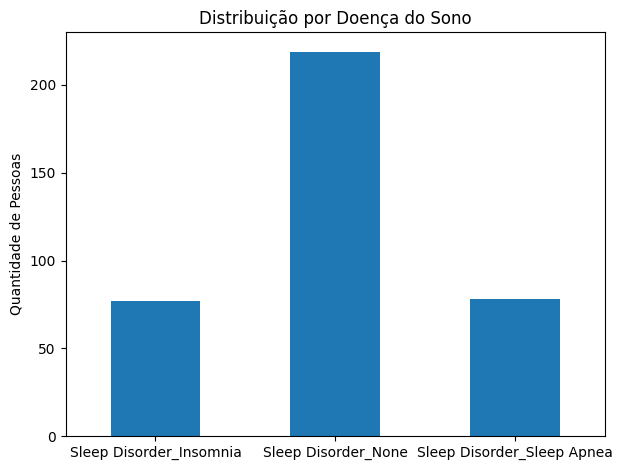

In [44]:
# noção da divisão de classes da variavel alvo sleep disorder
contagem_ocupacao = df.filter(like='Sleep Disorder_').sum()

print(contagem_ocupacao)

# gráfico de barras das somas para melhor visualização
df.filter(like='Sleep Disorder_').sum().plot(kind='bar')
plt.xticks(rotation=0, ha='center')
plt.title('Distribuição por Doença do Sono')
plt.ylabel('Quantidade de Pessoas')
plt.tight_layout()
plt.show()

Occupation_Accountant              37
Occupation_Doctor                  71
Occupation_Engineer                63
Occupation_Lawyer                  47
Occupation_Manager                  1
Occupation_Nurse                   73
Occupation_Sales Representative     2
Occupation_Salesperson             32
Occupation_Scientist                4
Occupation_Software Engineer        4
Occupation_Teacher                 40
dtype: int64


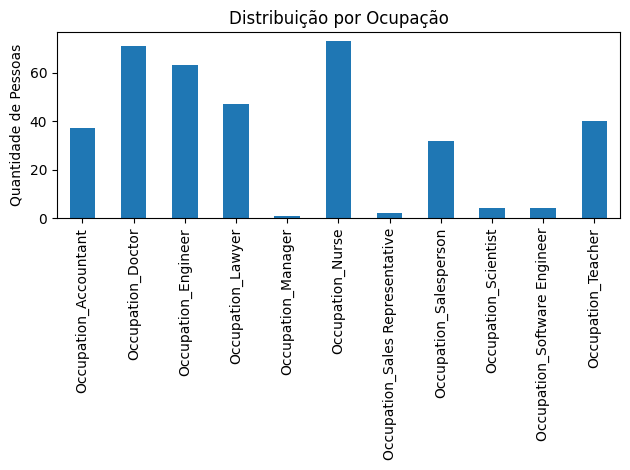

In [65]:
# noção da divisão de classes da ocupation
contagem_ocupacao = df.filter(like='Occupation_').sum()

print(contagem_ocupacao)

# gráfico de barras das somas para melhor visualização
df.filter(like='Occupation_').sum().plot(kind='bar')
plt.xticks(rotation=90, ha='center')
plt.title('Distribuição por Ocupação')
plt.ylabel('Quantidade de Pessoas')
plt.tight_layout()
plt.show()

Gender_Female    185
Gender_Male      189
dtype: int64


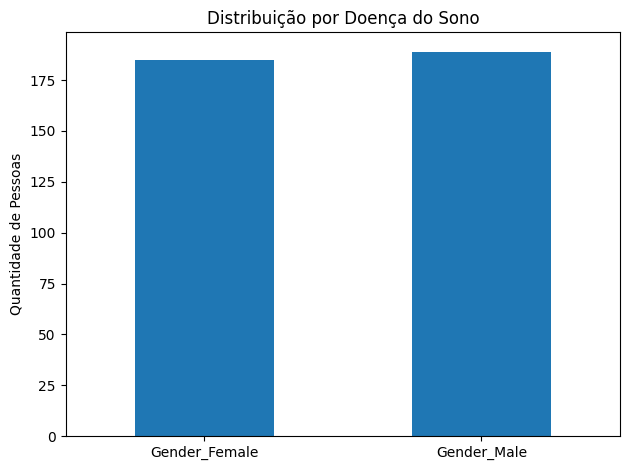

In [60]:
# noção da divisão de classes da variavel alvo sleep disorder
contagem_ocupacao = df.filter(like='Gender_').sum()

print(contagem_ocupacao)

# gráfico de barras das somas para melhor visualização
df.filter(like='Gender_').sum().plot(kind='bar')
plt.xticks(rotation=0, ha='center')
plt.title('Distribuição por Doença do Sono')
plt.ylabel('Quantidade de Pessoas')
plt.tight_layout()
plt.show()

BMI Category_Normal           195
BMI Category_Normal Weight     21
BMI Category_Obese             10
BMI Category_Overweight       148
dtype: int64


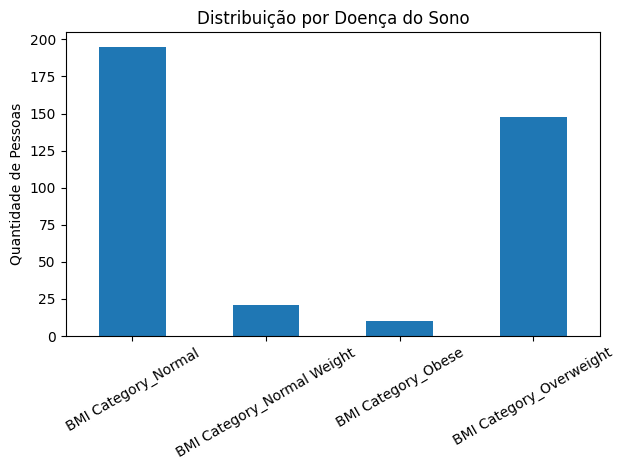

In [66]:
# noção da divisão de classes da variavel alvo sleep disorder
contagem_ocupacao = df.filter(like='BMI Category_').sum()

print(contagem_ocupacao)

# gráfico de barras das somas para melhor visualização
df.filter(like='BMI Category_').sum().plot(kind='bar')
plt.xticks(rotation=30, ha='center')
plt.title('Distribuição por Doença do Sono')
plt.ylabel('Quantidade de Pessoas')
plt.tight_layout()
plt.show()

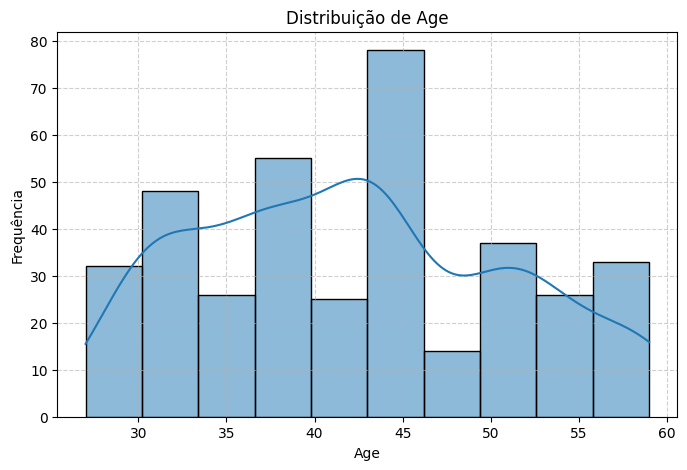


DADOS EXTRAS:
Média: 42.18449197860963
Desvio padrão: 8.673133465547243
Máximo: 59
Mínimo: 27
Assimetria: 0.25722214227428436
Curtose: 2.090220452374041




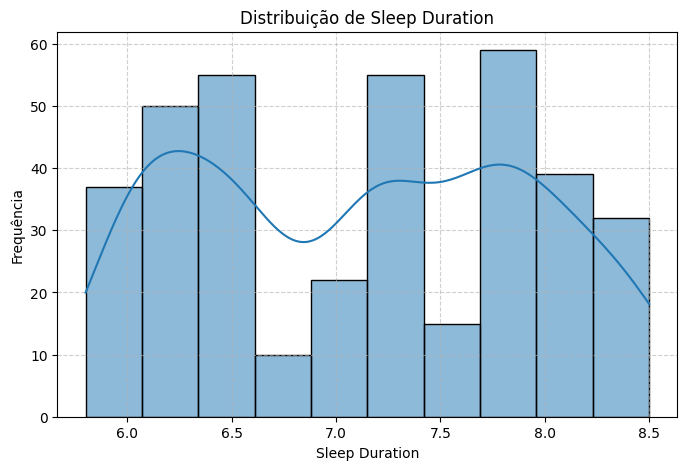


DADOS EXTRAS:
Média: 7.132085561497325
Desvio padrão: 0.7956567308898189
Máximo: 8.5
Mínimo: 5.8
Assimetria: 0.037554389846484834
Curtose: 1.7134937609549248




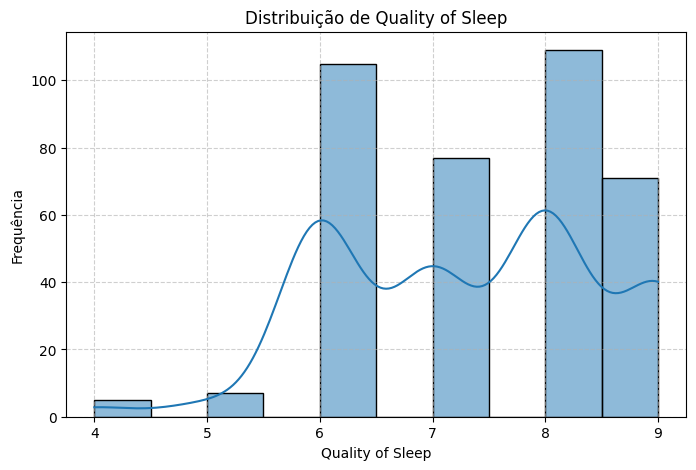


DADOS EXTRAS:
Média: 7.31283422459893
Desvio padrão: 1.196955919733606
Máximo: 9
Mínimo: 4
Assimetria: -0.2074476317383607
Curtose: 2.251724458145196




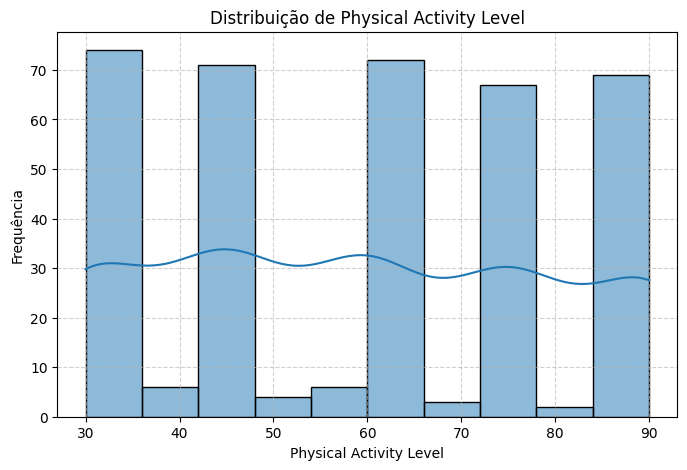


DADOS EXTRAS:
Média: 59.17112299465241
Desvio padrão: 20.83080365807167
Máximo: 90
Mínimo: 30
Assimetria: 0.07448690272010197
Curtose: 1.7339322281038403




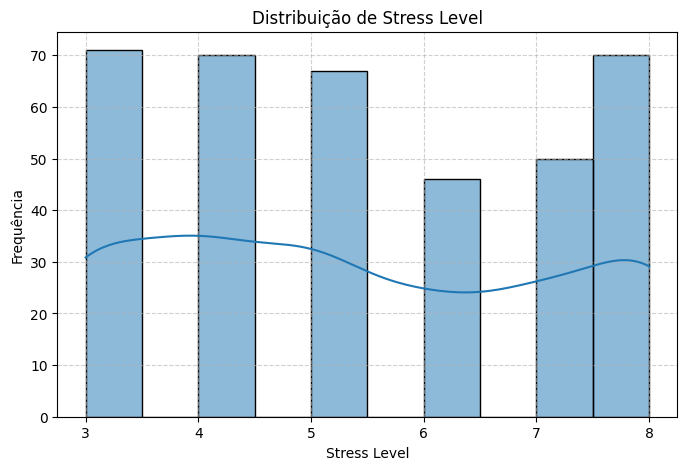


DADOS EXTRAS:
Média: 5.385026737967914
Desvio padrão: 1.774526444198519
Máximo: 8
Mínimo: 3
Assimetria: 0.15432958161578225
Curtose: 1.6726934355421634




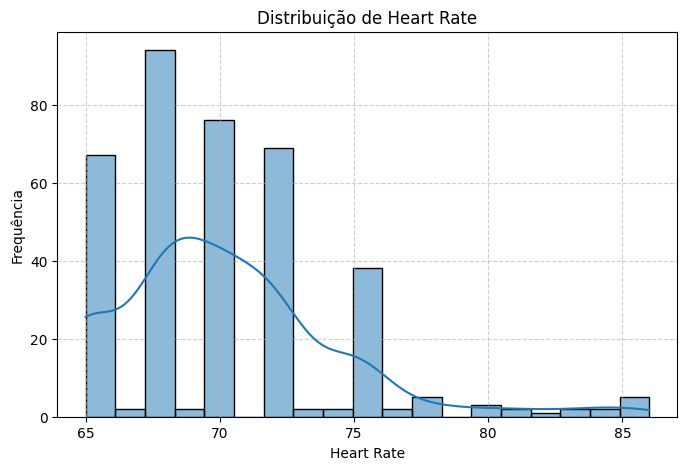


DADOS EXTRAS:
Média: 70.16577540106952
Desvio padrão: 4.135675535112215
Máximo: 86
Mínimo: 65
Assimetria: 1.2248235470533522
Curtose: 5.28645466720358




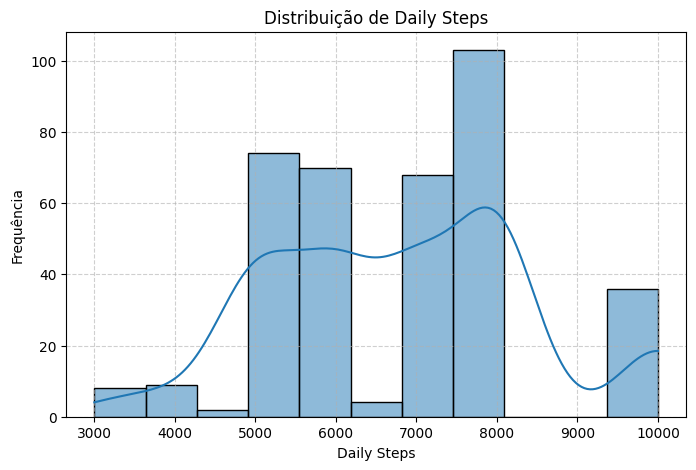


DADOS EXTRAS:
Média: 6816.844919786096
Desvio padrão: 1617.915679133636
Máximo: 10000
Mínimo: 3000
Assimetria: 0.17827733092832268
Curtose: 2.6059693981778485




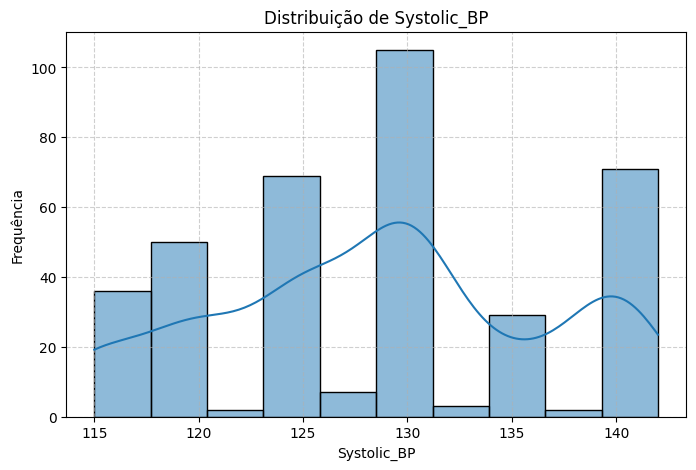


DADOS EXTRAS:
Média: 128.55347593582889
Desvio padrão: 7.748117557645013
Máximo: 142
Mínimo: 115
Assimetria: -0.035668867553754834
Curtose: 2.1064563218096577




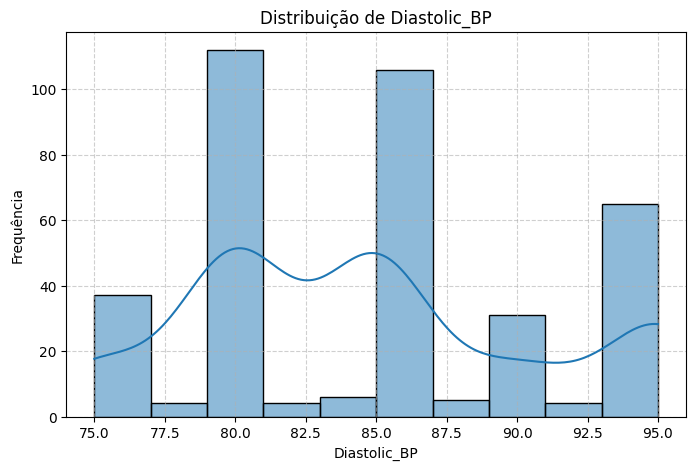


DADOS EXTRAS:
Média: 84.64973262032086
Desvio padrão: 6.1616114525659205
Máximo: 95
Mínimo: 75
Assimetria: 0.3785701203397363
Curtose: 2.1613071925963903




In [67]:
# Gráficos de distribuição para as features não categóricas

df_iterar = df.copy()
colunas_remover = df.filter(regex='Sleep Disorder_|Occupation_|Person ID|BMI Category_|Gender_').columns
df_iterar = df.drop(columns=colunas_remover, axis=1)

for coluna in df_iterar.columns:
  plt.figure(figsize=(8, 5))
  sns.histplot(x=df[coluna], kde=True)
  plt.title(f'Distribuição de {coluna}')
  plt.xlabel(coluna)
  plt.ylabel('Frequência')
  plt.grid(True, linestyle='--', alpha=0.6)
  plt.show()

  print('\nDADOS EXTRAS:')
  print(f'Média: {df[coluna].mean()}')
  print(f'Desvio padrão: {df[coluna].std()}')
  print(f'Máximo: {max(df[coluna])}')
  print(f'Mínimo: {min(df[coluna])}')
  print(f'Assimetria: {skew(df[coluna], bias=False)}')
  print(f'Curtose: {kurtosis(df[coluna], bias=False, fisher=False)}')
  print('\n')

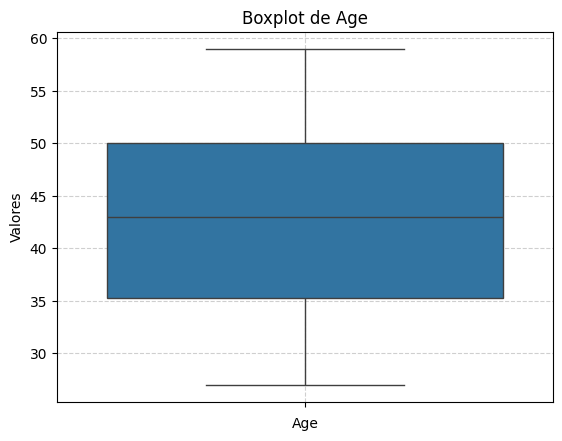

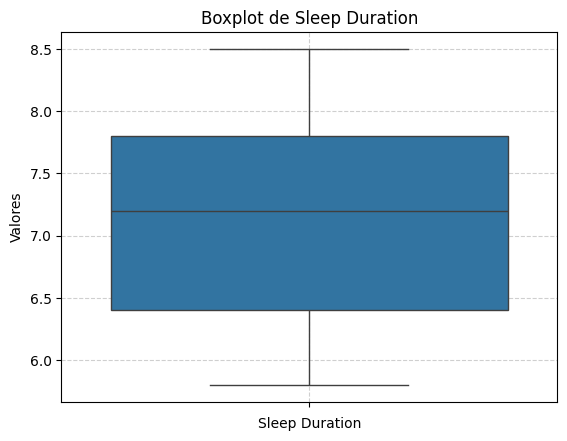

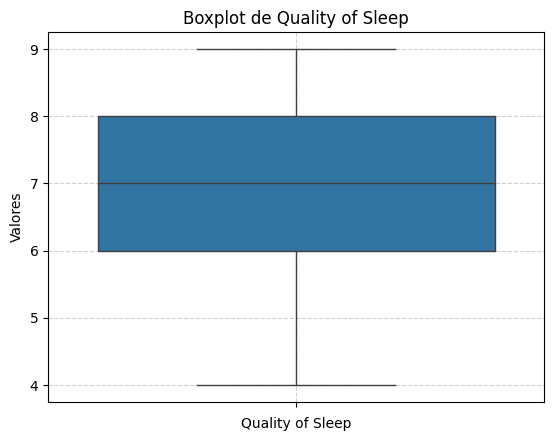

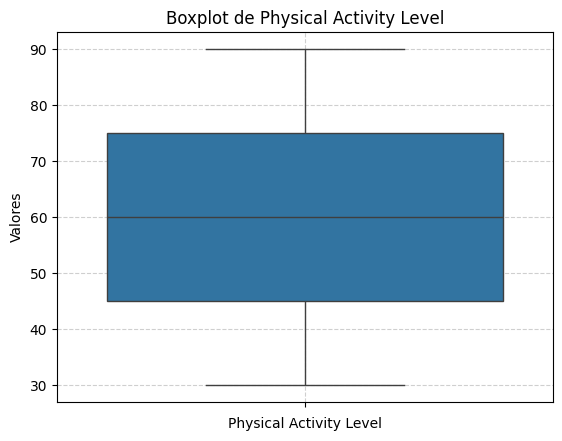

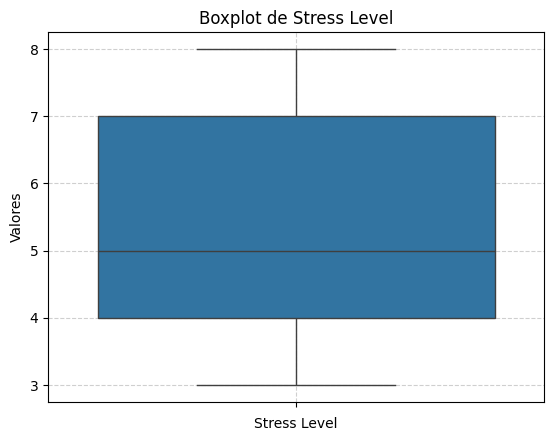

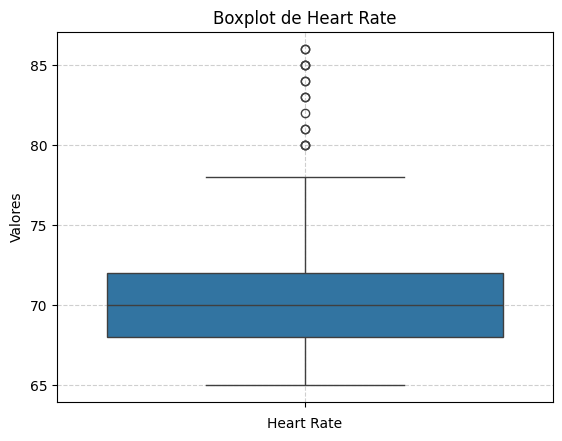

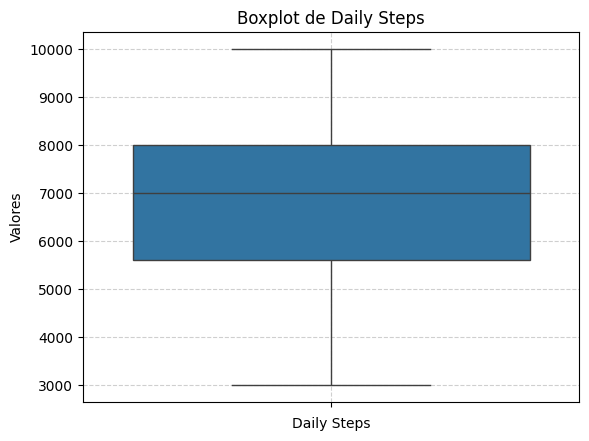

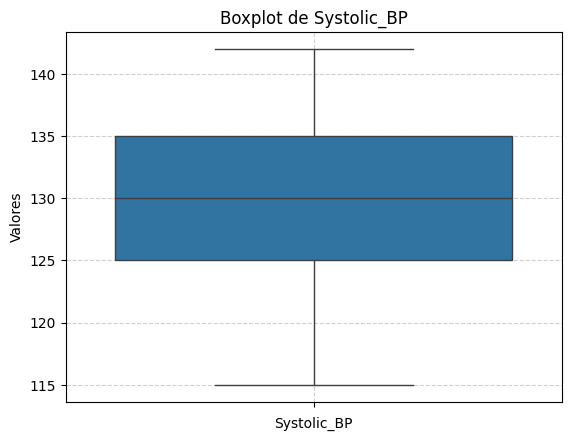

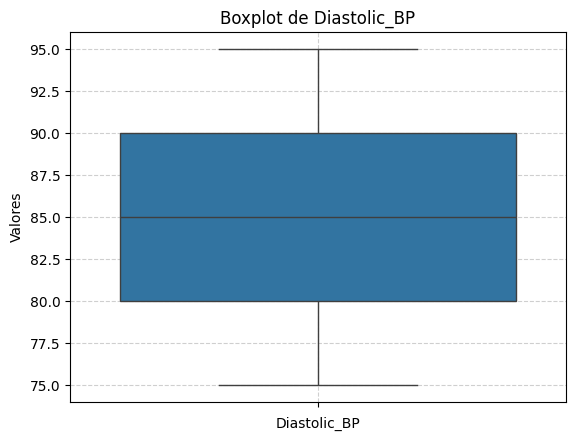

In [ ]:
# boxplots para outliers

df_iterar = df.copy()
colunas_remover = df.filter(regex='Sleep Disorder_|Occupation_|Person ID|BMI Category_|Gender_').columns
df_iterar = df.drop(columns=colunas_remover, axis=1)

for coluna in df_iterar.columns:
  sns.boxplot(y=df[coluna])
  plt.title(f'Boxplot de {coluna}')
  plt.xlabel(coluna)
  plt.ylabel('Valores')
  plt.grid(True, linestyle='--', alpha=0.6)
  plt.show()

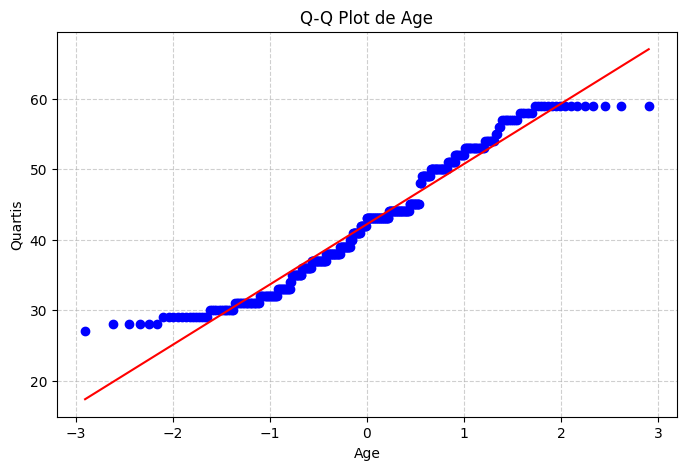

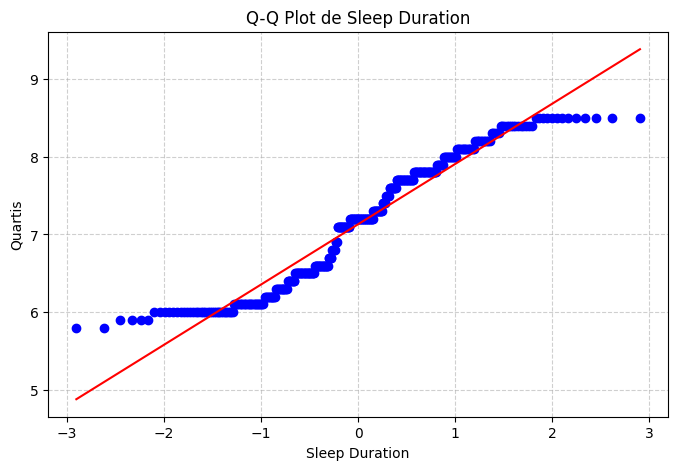

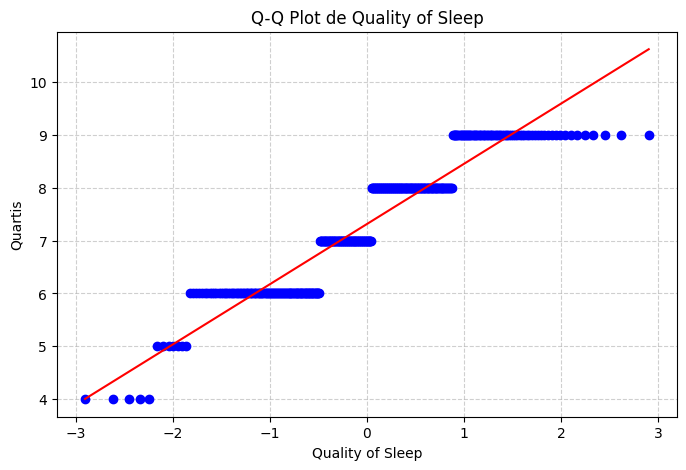

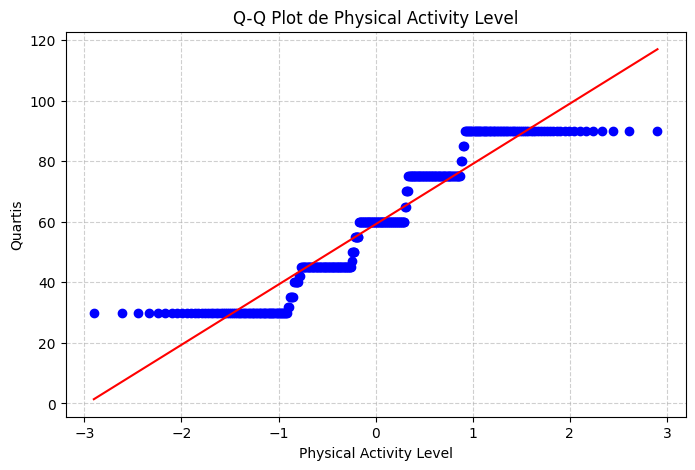

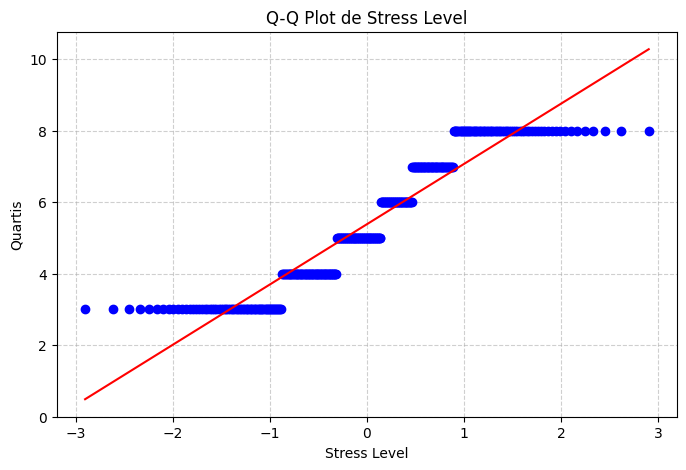

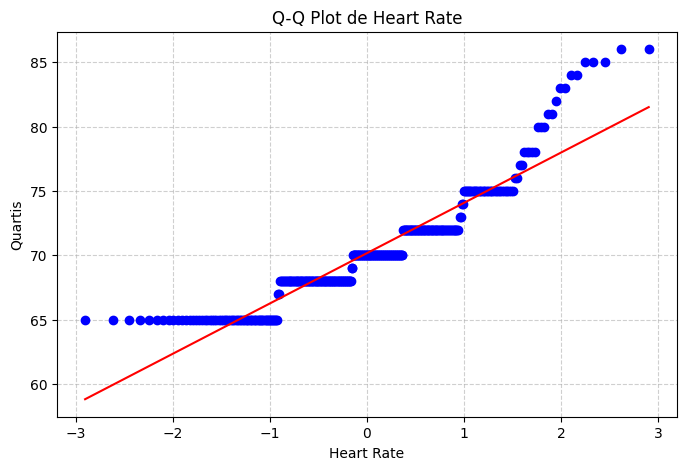

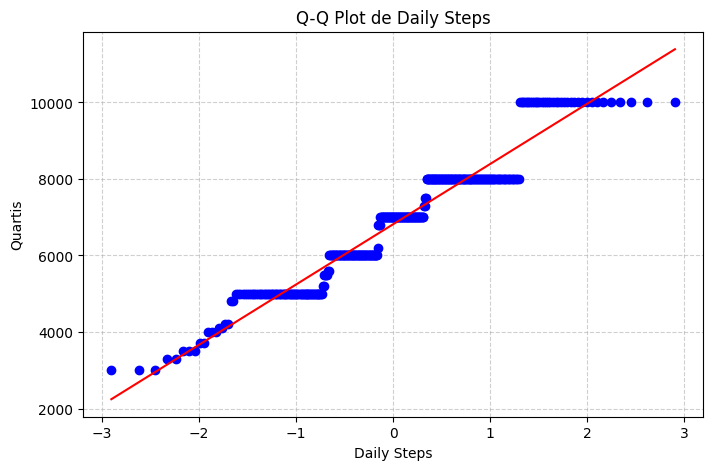

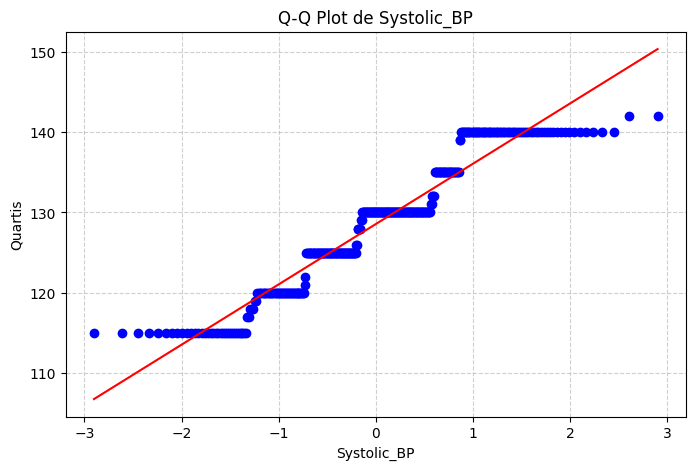

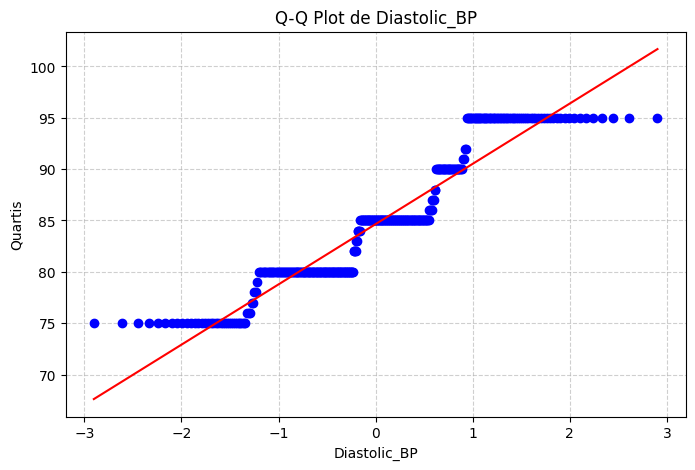

In [ ]:
# plotagem de Q-Q plots para comparar as distribuições com a normal
for coluna in df_iterar.columns:
  plt.figure(figsize=(8, 5))
  stats.probplot(df[coluna], dist = 'norm', plot = plt)
  plt.grid(True, linestyle = '--', alpha = 0.6)
  plt.xlabel(coluna)
  plt.ylabel('Quartis')
  plt.title(f'Q-Q Plot de {coluna}')
  plt.show()